# About Dataset

https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

The dataset consists of a comprehensive collection of salary and demographic information with additional details on years of experience. It offers a valuable resource for studying the relationship between income and various socio-demographic factors. The demographic attributes include age, gender, education, country, and race, providing a diverse range of variables for analysis. Researchers can explore patterns and trends in income distribution across different demographic categories, allowing for insights into potential disparities or variations in earning potential. Moreover, the dataset incorporates the crucial dimension of years of experience, enabling investigations into the impact of professional tenure on salary levels. This aspect adds a dynamic aspect to the analysis, enabling researchers to examine how income varies based on both demographic characteristics and accumulated work experience. The dataset presents a rich opportunity for conducting comprehensive studies on income diversity and understanding the multifaceted factors influencing earning potential in today's workforce.

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [288]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.pop(df.columns[0])
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [289]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [290]:
df.dropna(subset='Salary', inplace=True)

In [291]:
# Unique values in each column
for col in df.select_dtypes(include="object").columns:
    print(col, df[col].unique())

Gender ['Male' 'Female' 'Other']
Education Level ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree" nan
 'High School' 'phD']
Job Title ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account

In [292]:
#edit repeptitive labels for Education Level
df['Education Level'].replace("Bachelor's Degree","Bachelor's", inplace=True)
df['Education Level'].replace("Master's Degree","Master's", inplace=True)
df['Education Level'].replace("phD", "PhD", inplace=True)

In [293]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

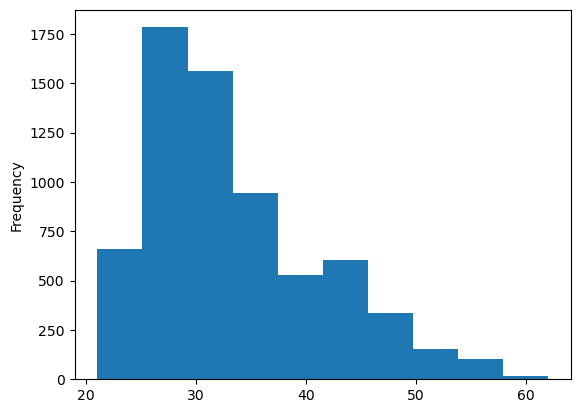

In [294]:
df['Age'].plot.hist();

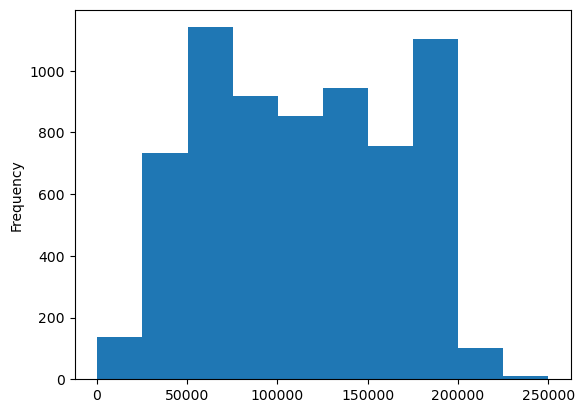

In [295]:
df['Salary'].plot.hist();

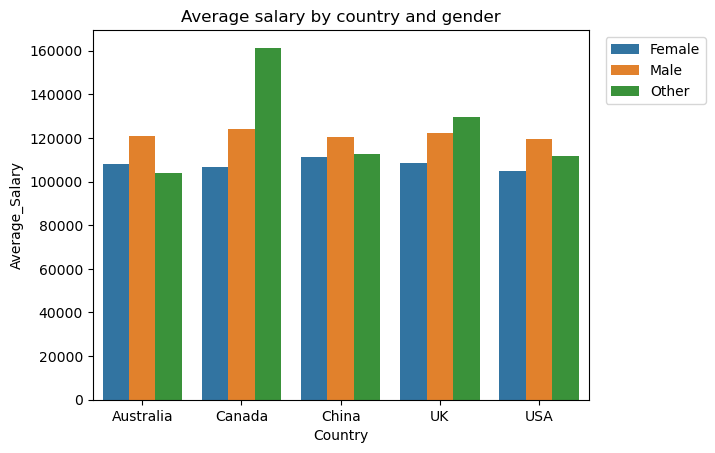

In [296]:
t = df.groupby(['Country', 'Gender']).agg(Average_Salary=('Salary','mean')).reset_index()
sns.barplot(data=t, x="Country", y="Average_Salary", hue="Gender");
plt.title('Average salary by country and gender')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

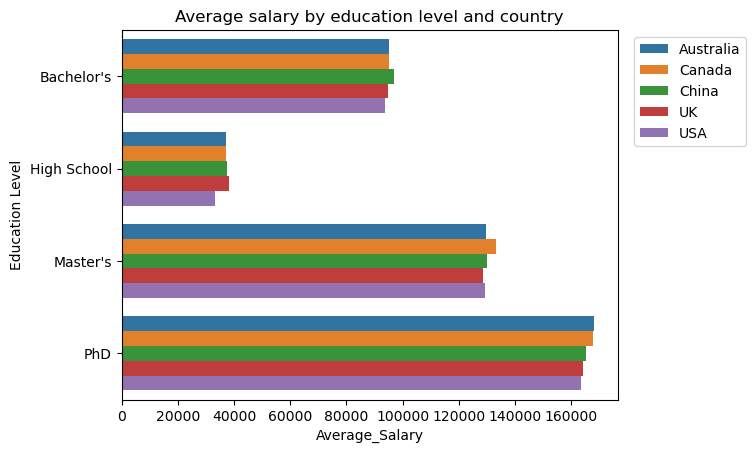

In [297]:
t = df.groupby(['Country', 'Education Level']).agg(Average_Salary=('Salary','mean')).reset_index()
sns.barplot(data=t, x="Average_Salary", y="Education Level", hue="Country");
plt.title('Average salary by education level and country')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

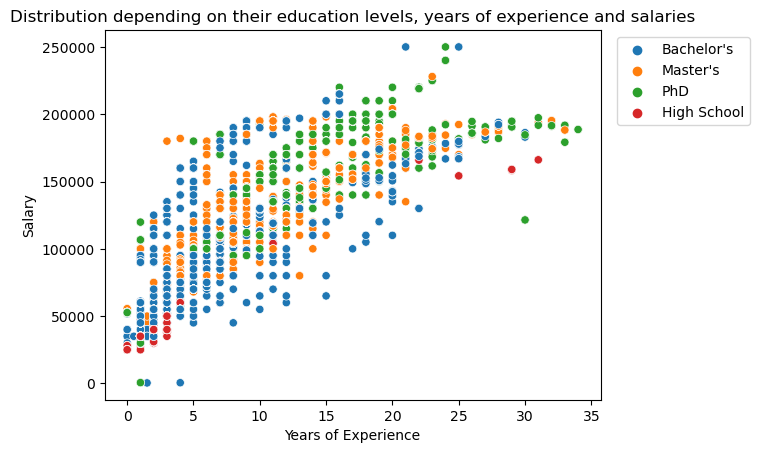

In [298]:
sns.scatterplot(data=df, x="Years of Experience", y="Salary", hue="Education Level")
plt.title('Distribution depending on their education levels, years of experience and salaries')
plt.legend(bbox_to_anchor=(1.02, 1));

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_7256\131282226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Years of Experience Range']=pd.cut(t["Years of Experience"],bins=cut_limit, labels=cut_years)


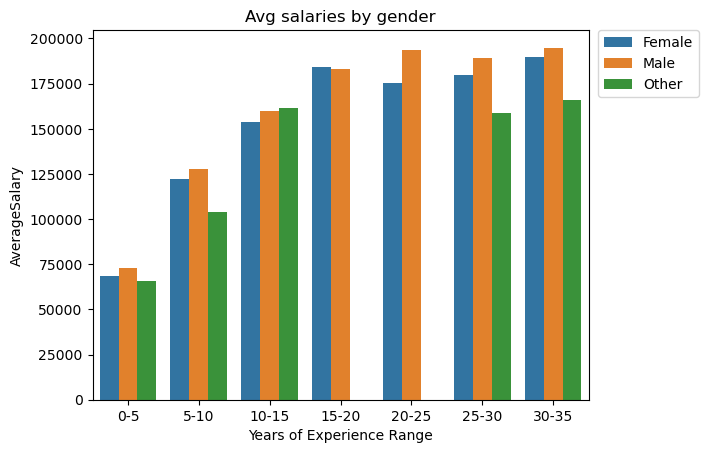

In [299]:
t = df[['Years of Experience', 'Gender', 'Salary']]
cut_years=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35"]
cut_limit=[0, 5, 10, 15, 20, 25, 30, 35]
t['Years of Experience Range']=pd.cut(t["Years of Experience"],bins=cut_limit, labels=cut_years)
t = t.groupby(['Years of Experience Range', 'Gender']).agg(AverageSalary=('Salary', 'mean')).reset_index()

sns.barplot(data=t, x="Years of Experience Range", y="AverageSalary", hue="Gender")
plt.title("Avg salaries by gender")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [300]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
# imputer2 = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

# imputer = imputer.fit(df['Salary'].values.reshape(-1, 1))
# df['Salary'] = imputer.transform(df['Salary'].values.reshape(-1, 1))
# imputer = imputer.fit(df['Age'].values.reshape(-1, 1))
# df['Age'] = imputer.transform(df['Age'].values.reshape(-1, 1))
# imputer = imputer.fit(df['Years of Experience'].values.reshape(-1, 1))
# df['Years of Experience'] = imputer.transform(df['Years of Experience'].values.reshape(-1, 1))
# imputer2 = imputer2.fit(df['Gender'].values.reshape(-1, 1))
# df['Gender'] = imputer2.transform(df['Gender'].values.reshape(-1, 1))
# imputer2 = imputer2.fit(df['Job Title'].values.reshape(-1, 1))
# df['Job Title'] = imputer2.transform(df['Job Title'].values.reshape(-1, 1))

# imputer2 = imputer2.fit(df['Education Level'].values.reshape(-1, 1))
# df['Education Level'] = imputer2.transform(df['Education Level'].values.reshape(-1, 1))

In [301]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

X = df.drop('Salary', axis=1)
y = df['Salary']

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values = np.nan,strategy='mean'))
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_features)
       
    ])

In [302]:
X = preprocessor.fit_transform(X)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5359, 216), (5359,), (1340, 216), (1340,))

In [304]:
def scores(true, preds):
    r2_square = r2_score(true, preds)
    mae = mean_absolute_error(true, preds)
    rmse = np.sqrt(mean_squared_error(true, preds))
    return mae, rmse, r2_square

In [305]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_r2_scores = {}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    mae, rmse, r2 = scores(y_test, y_preds)
    
    model_r2_scores[name] = r2
    print(name)
    print("RMSE: {:.4f}".format(rmse))
    print("MAE: {:.4f}".format(mae))
    print("R2 Score: {:.4f}".format(r2))
    print("\n")

Linear Regression
RMSE: 21307.2729
MAE: 15475.1610
R2 Score: 0.8322


Lasso
RMSE: 21310.5185
MAE: 15480.8308
R2 Score: 0.8322


Ridge
RMSE: 21327.7619
MAE: 15533.5679
R2 Score: 0.8319


K-Neighbors Regressor
RMSE: 15263.6213
MAE: 9226.4840
R2 Score: 0.9139


Decision Tree
RMSE: 8910.1121
MAE: 3025.7650
R2 Score: 0.9707


Random Forest Regressor
RMSE: 7571.2145
MAE: 3263.0833
R2 Score: 0.9788


XGBRegressor
RMSE: 9168.4358
MAE: 5693.5033
R2 Score: 0.9689


CatBoosting Regressor
RMSE: 9485.3199
MAE: 6179.1233
R2 Score: 0.9667


AdaBoost Regressor
RMSE: 24869.0612
MAE: 21494.0171
R2 Score: 0.7714




In [306]:
pd.DataFrame(model_r2_scores.items(), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.978815
4,Decision Tree,0.970660
6,XGBRegressor,0.968934
7,CatBoosting Regressor,0.966749
3,K-Neighbors Regressor,0.913898
0,Linear Regression,0.832216
1,Lasso,0.832165
2,Ridge,0.831893
8,AdaBoost Regressor,0.771433


In [307]:
xgb = XGBRegressor(n_estimators=500, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [308]:
xgb.score(X_test, y_test)

0.9775311546853951

In [309]:
catb = CatBoostRegressor(verbose=0, learning_rate=0.15)
catb.fit(X_train, y_train)

In [310]:
catb.score(X_test, y_test)

0.9746696073446166

In [311]:
xgb_preds = xgb.predict(X_test)
catb_preds = catb.predict(X_test)

print('MAE (XGBoost):', mean_absolute_error(y_test, xgb_preds))
print('MAE (CatBoost):', mean_absolute_error(y_test, catb_preds))

MAE (XGBoost): 3845.0016164295707
MAE (CatBoost): 4736.708060288893
